In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/zhmikhail/Downloads/Electronic_sales_Sep2023-Sep2024.csv')

df['Purchase_Date'] = pd.to_datetime(df['Purchase Date'])

print("=== ЗАДАНИЕ 1 ===")

customer_analysis = df.groupby('Customer ID').agg({
    'Payment Method': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
    'Total Price': 'sum',
    'Add-on Total': 'sum',
}).rename(columns={
    'Payment_Method': 'Preferred Payment Method',
    'Total_Price': 'Total Spent',
    'Add-on_Total': 'Total Addon Spent', 
}).reset_index()

print("Анализ по покупателям:")
print(customer_analysis.head(10))

=== ЗАДАНИЕ 1 ===
Анализ по покупателям:
   Customer ID Payment Method  Total Price  Add-on Total
0         1000    Credit Card      6279.42         66.30
1         1002           Cash      5020.60         60.16
2         1003           Cash        41.50         35.56
3         1004    Credit Card        83.00         65.78
4         1005     Debit Card     11779.11         75.33
5         1006           Cash     12184.27        133.43
6         1007    Credit Card      7120.71         55.48
7         1008           Cash      3379.32         65.85
8         1011    Credit Card      7911.90         70.17
9         1013         Paypal      5538.33         57.81


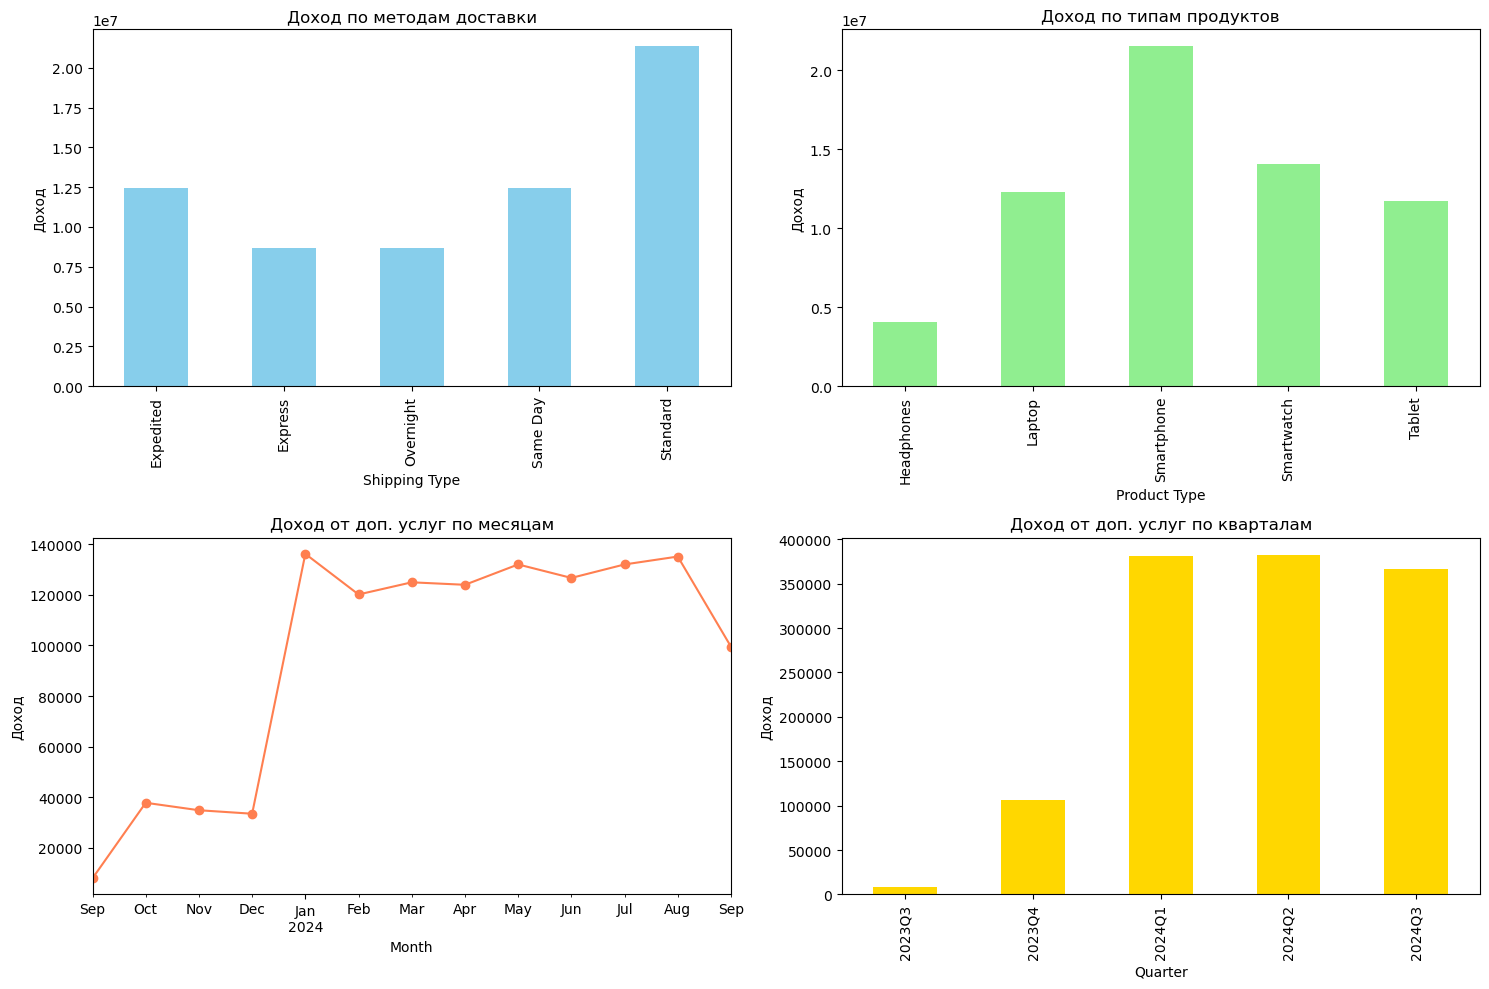

Доход по методам доставки:
Shipping Type
Expedited    12437526.21
Express       8685215.62
Overnight     8704828.17
Same Day     12432024.82
Standard     21343073.55
Name: Total Price, dtype: float64

Доход по типам продуктов:
Product Type
Headphones     4041400.24
Laptop        12296239.97
Smartphone    21516754.69
Smartwatch    14036273.06
Tablet        11712000.41
Name: Total Price, dtype: float64

Доход от доп. услуг по месяцам:
Month
2023-09      8012.62
2023-10     37837.12
2023-11     34888.81
2023-12     33509.15
2024-01    136195.16
2024-02    120148.92
2024-03    124954.26
2024-04    123973.59
2024-05    132018.51
2024-06    126689.59
2024-07    132017.20
2024-08    135133.14
2024-09     99518.89
Freq: M, Name: Add-on Total, dtype: float64

Доход от доп. услуг по кварталам:
Quarter
2023Q3      8012.62
2023Q4    106235.08
2024Q1    381298.34
2024Q2    382681.69
2024Q3    366669.23
Freq: Q-DEC, Name: Add-on Total, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/zhmikhail/Downloads/Electronic_sales_Sep2023-Sep2024.csv')
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

revenue_by_shipping = df.groupby('Shipping Type')['Total Price'].sum()

revenue_by_product = df.groupby('Product Type')['Total Price'].sum()

df['Month'] = df['Purchase Date'].dt.to_period('M')
addon_revenue_monthly = df.groupby('Month')['Add-on Total'].sum()

df['Quarter'] = df['Purchase Date'].dt.to_period('Q')
addon_revenue_quarterly = df.groupby('Quarter')['Add-on Total'].sum()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

revenue_by_shipping.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Доход по методам доставки')
ax1.set_ylabel('Доход')

revenue_by_product.plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Доход по типам продуктов')
ax2.set_ylabel('Доход')

addon_revenue_monthly.plot(kind='line', ax=ax3, color='coral', marker='o')
ax3.set_title('Доход от доп. услуг по месяцам')
ax3.set_ylabel('Доход')

addon_revenue_quarterly.plot(kind='bar', ax=ax4, color='gold')
ax4.set_title('Доход от доп. услуг по кварталам')
ax4.set_ylabel('Доход')

plt.tight_layout()
plt.show()

print("Доход по методам доставки:")
print(revenue_by_shipping)
print("\nДоход по типам продуктов:")
print(revenue_by_product)
print("\nДоход от доп. услуг по месяцам:")
print(addon_revenue_monthly)
print("\nДоход от доп. услуг по кварталам:")
print(addon_revenue_quarterly)

In [3]:
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34
